In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering

from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, cophenet, dendrogram

np.set_printoptions(suppress=True)   # To avoid number in exp form

from sklearn.metrics.pairwise import euclidean_distances

In [2]:
data=pd.read_csv('customer.csv')
data.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


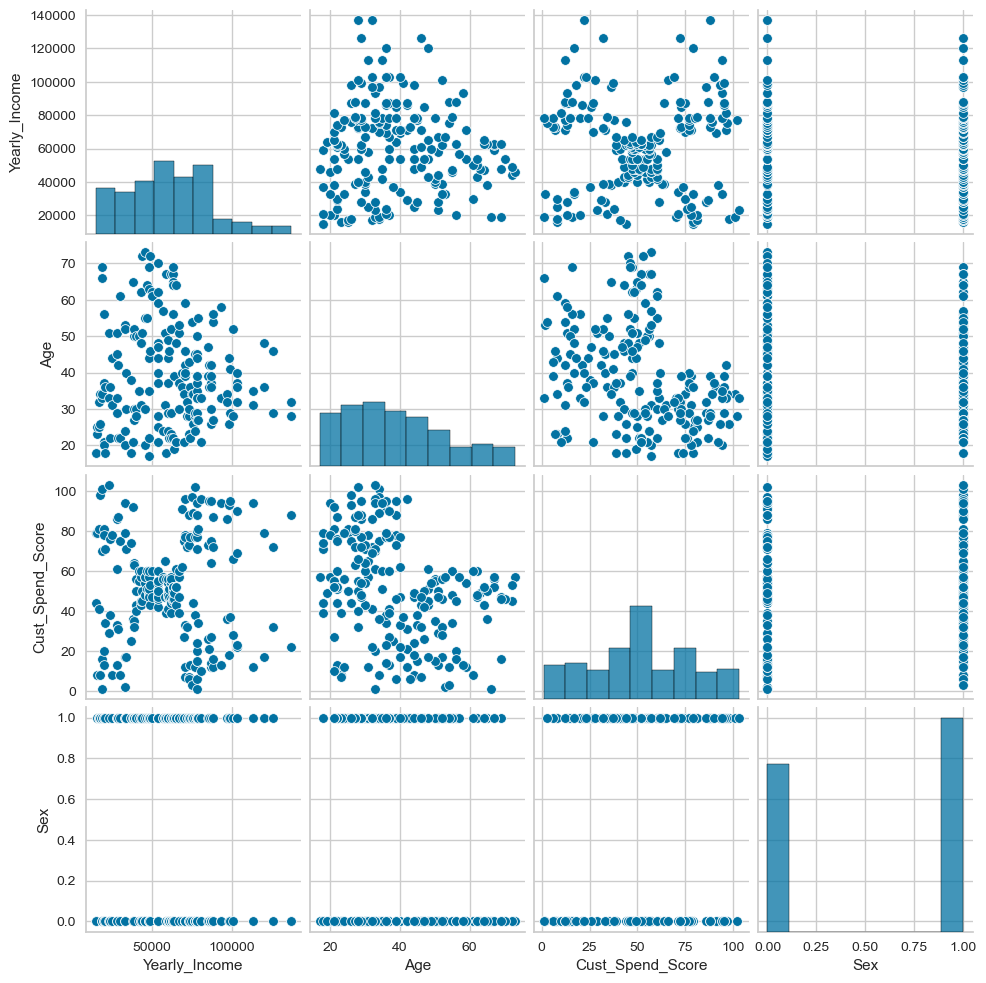

In [3]:
sns.pairplot(data)

### Visualize

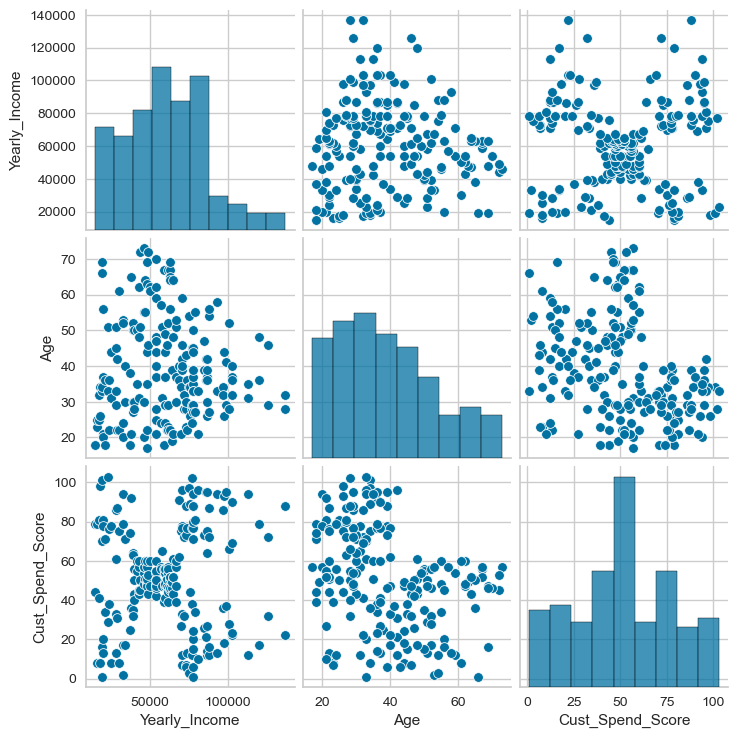

In [61]:
cols=['Yearly_Income','Age','Cust_Spend_Score']
sns.pairplot(data[cols])
plt.show()

**In Cust_spend_Score and Yearly_income we can cleary see some groups or the clusters in the data are forming. We can use these two columns and use k-mean clustering**

In [62]:
data_c=data[['Yearly_Income','Cust_Spend_Score']]
data_c

,Yearly_Income,Cust_Spend_Score
0,15000,44
1,15000,79
2,16000,8
3,16000,79
4,17000,41
...,...,...
195,120000,79
196,126000,32
197,126000,72
198,137000,22


In [63]:
# We need to scale the data before clustering
sc= StandardScaler()

data_c= sc.fit_transform(data_c)
data_c=pd.DataFrame(data_c,columns=['Yearly_Income','Cust_Spend_Score'])

In [64]:
data_c.head()

,Yearly_Income,Cust_Spend_Score
0,-1.738999,-0.284181
1,-1.738999,1.063563
2,-1.700830,-1.670433
3,-1.700830,1.063563
4,-1.662660,-0.399702


In [65]:
## K-Means clusting

In [66]:
# We need to identify the value of K
# Elbow Plot
# Silhoette Score

In [67]:
n_clus=[2,3,4,5,6,7,8]

In [68]:
wcss=[]
for i in n_clus:
    model=KMeans(n_clusters=i)
    model.fit(data_c)
    wcss.append(model.inertia_)

In [69]:
wcss

[269.6968358539574,
 158.58735419442456,
 110.00511756050396,
 66.69647392440946,
 56.016232266055795,
 45.54724874614022,
 38.30690563322015]

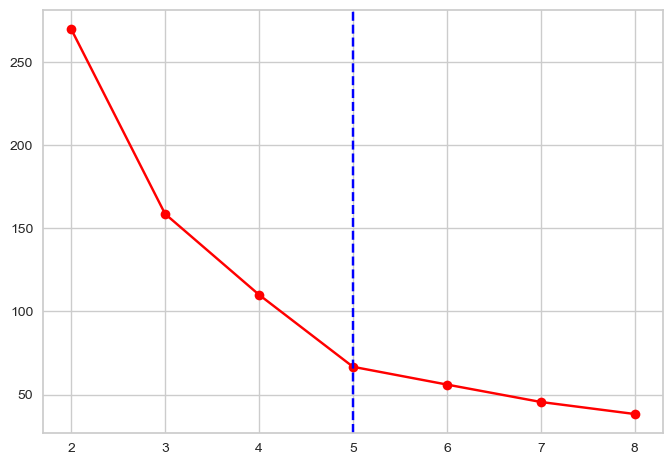

In [70]:
# Elbow plot
plt.plot(n_clus,wcss,color='red',marker='o')
plt.axvline(x=5,color='blue',ls='--')
plt.xticks(n_clus)
plt.show()

In [71]:
k_elbow=KElbowVisualizer(KMeans(),k=10)

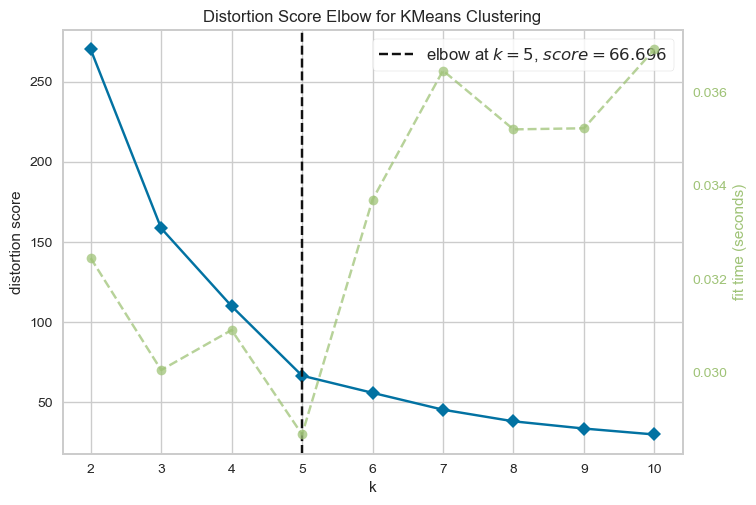

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
k_elbow.fit(data_c)
k_elbow.show()

In [6]:
# Silhoette Score to identify the value of k

In [74]:
sil_score =[]
for i in n_clus:
    model=KMeans(n_clusters=i)
    model.fit(data_c)
    pred=model.predict(data_c)
    sil_score.append(silhouette_score(data_c,pred))

In [75]:
sil_score

[0.3023136712720818,
 0.46552325533204225,
 0.4953283597895246,
 0.5520621436364275,
 0.5400545310397921,
 0.5284109639624426,
 0.45432141512061947]

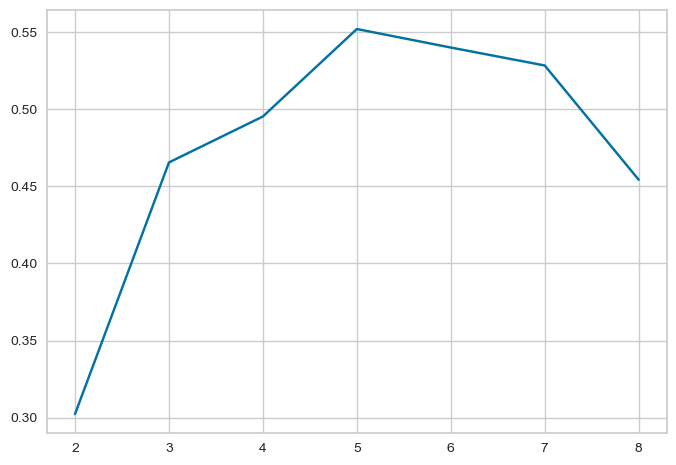

In [76]:
plt.plot(n_clus,sil_score)
plt.show()

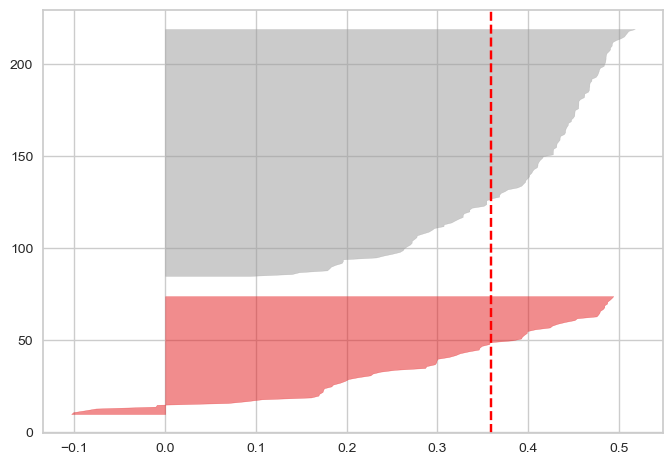

In [77]:
## Better way to visualize the silhouette score by using yellow brick
model=KMeans(n_clusters=2)
sil_viz=SilhouetteVisualizer(model)
sil_viz.fit(data_c)
plt.show()

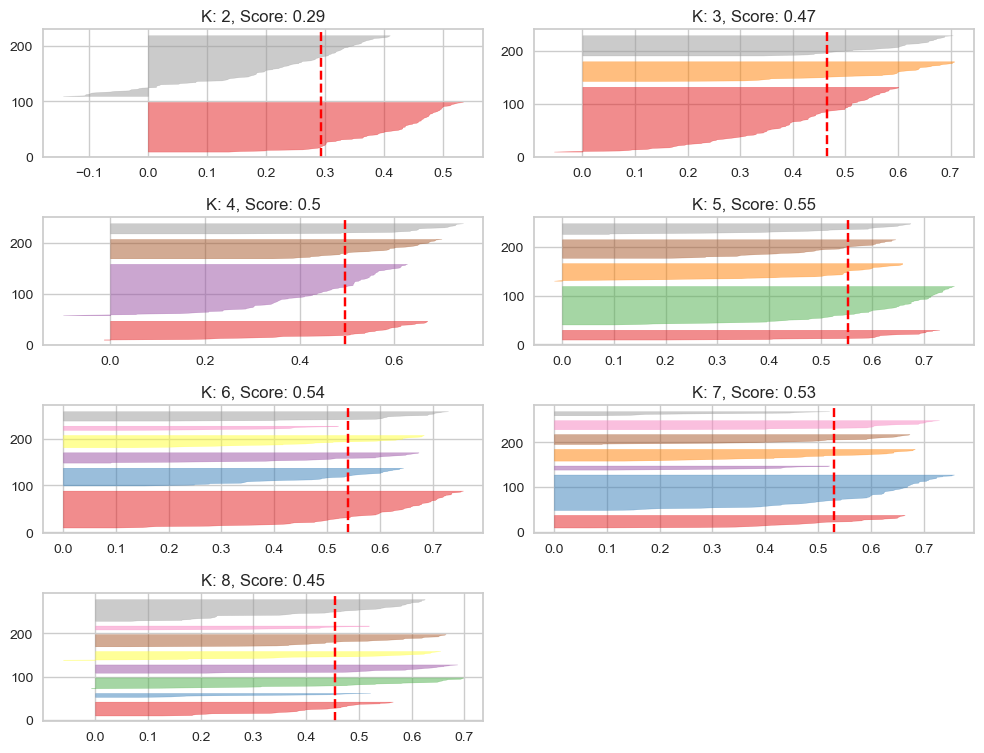

In [78]:
t=1
plt.figure(figsize=(10,15))
for i in n_clus:
    plt.subplot(8,2,t)
    model=KMeans(n_clusters=i)
    sil_viz=SilhouetteVisualizer(model)
    sil_viz.fit(data_c)
    plt.title(f'K: {i}, Score: {np.round(sil_viz.silhouette_score_,2)}')
    t+=1
plt.tight_layout()
plt.show()

**As per K Elbow plot and silhouette Vizualizer k =5 is the best value of k for clusters, if there is change in value of k, we will choose silhouette score**

In [79]:
final_model=KMeans(n_clusters=5)

In [80]:
final_model.fit(data_c)

KMeans(n_clusters=5)

In [81]:
final_model.predict(data_c)

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [82]:
data['K_means_pred']=final_model.predict(data_c)

In [83]:
data

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex,K_means_pred
0,CUSTID1,15000,18,44,0,4
1,CUSTID2,15000,18,79,0,0
2,CUSTID3,16000,23,8,1,4
3,CUSTID4,16000,25,79,1,0
4,CUSTID5,17000,32,41,1,4
...,...,...,...,...,...,...
195,CUSTID196,120000,36,79,1,3
196,CUSTID197,126000,46,32,1,1
197,CUSTID198,126000,29,72,0,3
198,CUSTID199,137000,32,22,0,1


In [84]:
data['K_means_pred'].value_counts()

K_means_pred
2    80
3    39
1    37
4    23
0    21
Name: count, dtype: int64

In [85]:
final_model.cluster_centers_

array([[-1.35366972,  1.16441429],
       [ 1.02054738, -1.24685589],
       [-0.22414997, -0.00693126],
       [ 0.99158305,  1.23437568],
       [-1.30751869, -1.12631231]])

In [86]:
centroids=final_model.cluster_centers_

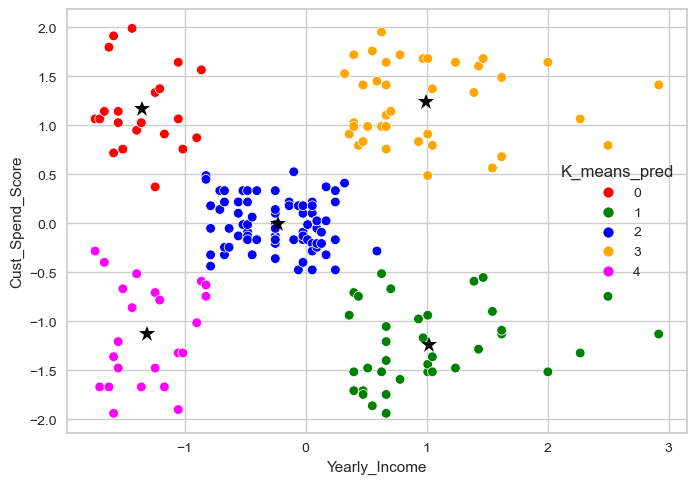

In [87]:
# Visualise the clusters
sns.scatterplot(x=data_c['Yearly_Income'],y=data_c['Cust_Spend_Score'],hue=data['K_means_pred'],\
                palette=['red','green','blue','orange','magenta'])
for i in range(5):
    plt.plot(centroids[i][0],centroids[i][1],color='black',marker='*',ms=12)
plt.show()

In [88]:
data.groupby('K_means_pred').agg({'Yearly_Income': 'mean','Age': 'mean','Cust_Spend_Score': 'mean'})

,Yearly_Income,Age,Cust_Spend_Score
K_means_pred,,,
0,25095.238095,25.000000,81.619048
1,87297.297297,40.567568,19.000000
2,54687.500000,43.387500,51.200000
3,86538.461538,32.589744,83.435897
4,26304.347826,45.695652,22.130435


## Agglometrative Clustering

In [89]:
# Lets Create a linkage matrix
link_mat=linkage(data_c, method='complete')  # Method can be single, complete,centroid,ward,average

In [90]:
link_mat.shape

(199, 4)

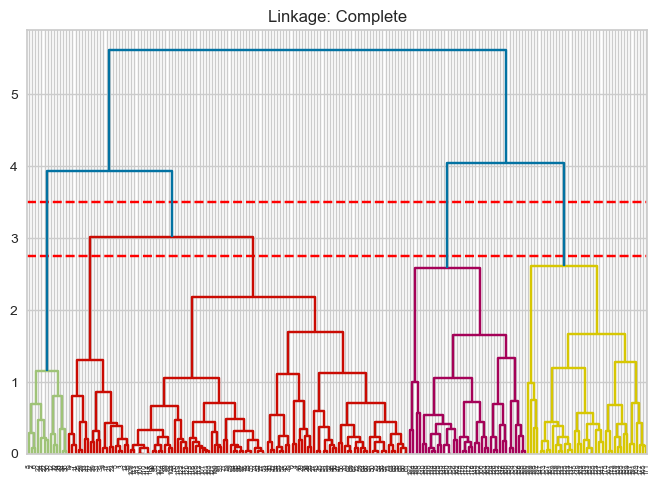

In [91]:
# Dendrogram
plt.title('Linkage: Complete')
plt.axhline(y=3.5,color='red',ls='--')
plt.axhline(y=2.75,color='red',ls='--')
dendrogram(link_mat)
plt.show()

In [92]:
# As per this horizonatl line correct value ok k can be 4 or 5
# We can use silhouette score to select value of k
for i in [4,5,6]:
    model= AgglomerativeClustering(n_clusters=i)
    pred=model.fit_predict(data_c)
    print(i,'k:',silhouette_score(data_c,pred))

4 k: 0.4880346129106644
5 k: 0.5446701394267819
6 k: 0.5311997416050789


In [93]:
# Cophenetic Correlation Coeff
# it is the correlation b/w the cophenetic distance (Dendrogram Distance) and the actual distance

dist_matrix= euclidean_distances(data_c)
dist_matrix.shape

(200, 200)

In [97]:
actual_dist=dist_matrix[np.triu_indices(200,k=1)]
print(actual_dist.shape)
actual_dist[:5]

(19900,)


array([1.34774417, 1.38677653, 1.34828455, 0.13846554, 1.42680178])

In [99]:
# Cophenetic distance dendogram
ccc, cophenetic_dist=cophenet(link_mat,actual_dist)

In [100]:
cophenetic_dist.shape

(19900,)

In [101]:
np.corrcoef(actual_dist,cophenetic_dist)

array([[1.        , 0.65874507],
       [0.65874507, 1.        ]])

In [102]:
ccc

0.6587450690038021

In [103]:
agglo_final=AgglomerativeClustering(n_clusters=5)

In [104]:
data['Agglo_pred']=agglo_final.fit_predict(data_c)

In [105]:
data['Agglo_pred'].value_counts()

Agglo_pred
2    88
1    39
0    32
3    21
4    20
Name: count, dtype: int64

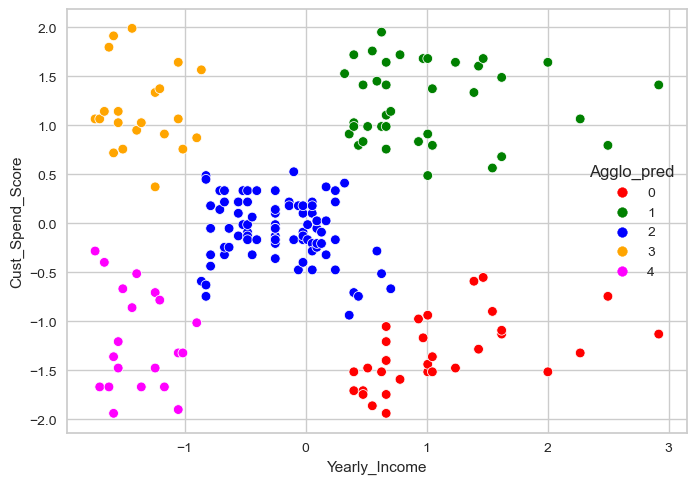

In [110]:
sns.scatterplot(x=data_c['Yearly_Income'],y=data_c['Cust_Spend_Score'],hue=data['Agglo_pred'],\
                palette=['red','green','blue','orange','magenta'])
plt.show()